In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
x = np.loadtxt('ex3x.dat', dtype=np.float32)
y = np.loadtxt('ex3y.dat', dtype=np.float32)

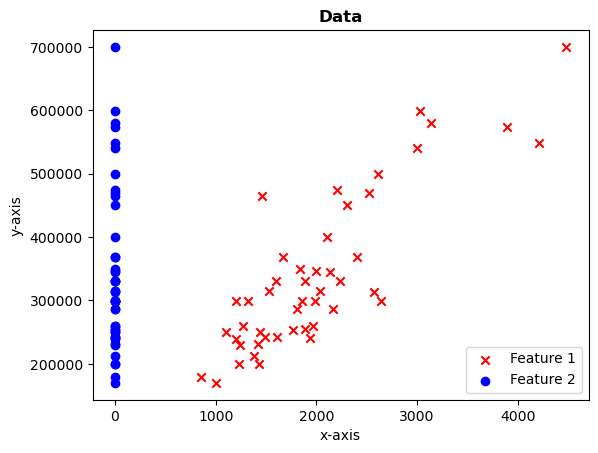

In [209]:
plt.scatter(x[:, 0], y , marker="x", c ='r', label="Feature 1")
plt.scatter(x[:, 1], y , marker='o', c='b', label="Feature 2")
plt.title("Data", fontweight = "bold")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

**First Column: Bias(intercept), next column: input feature**

In [210]:
X = np.ones((x.shape[0], 3)) ## x.shape[0] will give you the number of rows 
X[:,1] = x[:, 0]   ## first column of x is alloted to the 2nd column X
X[:,2] = x[:, 1]   ## second column of x is alloted to the 3rd column X
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

**feature Scaling**

__z-score Normalization__

In [211]:
X[:, 1] = (X[:, 1] - np.mean(X[:,1]))/np.std(X[:,1])
X[:, 2] = (X[:, 2] - np.mean(X[:,2]))/np.std(X[:,2])

y =(y - np.mean(y))/np.std(y)

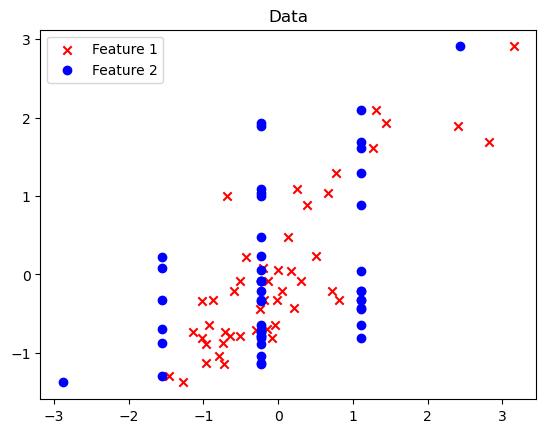

In [212]:
plt.scatter(X[:, 1], y, marker = 'x', c='r', label='Feature 1' )
plt.scatter(X[:, 2], y, marker = 'o', c = 'b', label='Feature 2')
plt.title('Data')
plt.legend()
plt.show()

In [213]:
def hypothesis(x,w):
    return np.dot(x,w)

In [214]:
def cost_function(x,w,y):
    return (1/(2*x.shape[0]))* sum(hypothesis(x,w) - y)**2

In [215]:
def gradient(x,y,w):
    return (1/(x.shape[0])* X.T.dot(hypothesis(x,w) - y))

In [216]:
w = np.array([0,0,0])
costVal = []
epochs = []

for i in range(1, 1000):
    costVal.append(cost_function(X,w,y))
    w = w - 0.004 * gradient(X,y,w)
    epochs.append(i)

In [217]:
w

array([2.82470575e-08, 8.03275107e-01, 2.67117604e-02])

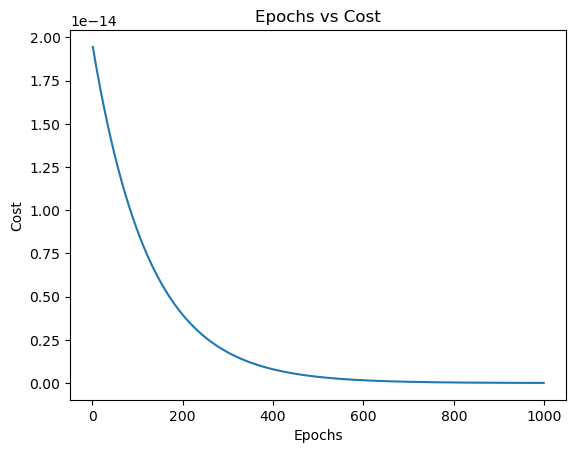

In [218]:
plt.plot(epochs,costVal)
plt.title("Epochs vs Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

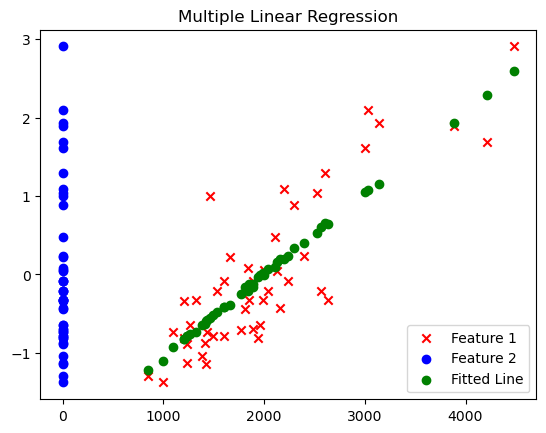

In [219]:
plt.scatter(x[:,0], y, marker = 'x', c='r', label = 'Feature 1')
plt.scatter(x[:,1], y, marker = 'o', c = 'b', label = 'Feature 2')
plt.scatter(x[:,0], hypothesis(X,w), c = 'g', label = 'Fitted Line')
plt.title("Multiple Linear Regression")
plt.legend()
plt.show()